In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as p
from matplotlib.mlab import normpdf
import seaborn

In [2]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append((3/(1+math.exp(-(.25*(item-35))))+1))
    return a
def drp_sig(x):
    a=[]
    for item in x: 
        a.append((2.2/(1+math.exp(-(.25*(item-33))))+1))
    return a

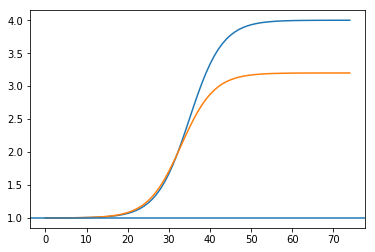

In [3]:
xdata = np.arange(0, 75, 1)
sig = sigmoid(xdata)
drp= drp_sig(xdata)
plt.plot(xdata,sig)
plt.plot(xdata,drp)
plt.axhline(y=1.0)
plt.show()



In [4]:
def crosses(f, min_line):
  #print "inside", min_line
  for i in range(len(f)):
    if i == (len(f)-1): 
      return i
    y1 = f[i]
    y2 = f[i+1]
    #print y1, y2, min_line
    above = y1 > min_line and y2 > min_line
    below = y1 < min_line and y2 < min_line
    if not (above or below):
      #printprint y1, y2, i, min_line
      return i
    
def sigmoid_d2(x, x0, k, y0, a, b):
  y = (a * k**2 * np.exp(k* (x + x0)) * ((np.exp(k*x0))-(b*np.exp(k*x)))) / (b*np.exp(k*x) + np.exp(k*x0))**3
  return y  

In [5]:
def sigmoid_inflection(xs, x0, k, y0, a, b):  #inflection point for xfits 
  ys = [sigmoid_d2(x, x0, k, y0, a, b) for x in xs]
  return crosses(ys,0)

def sigmoid_d1(x, x0, k, y0, a, b):
  y = (a * k*np.exp(k*(x+x0))) / (b*np.exp(k*x) + np.exp(k*x0))**2
  return y

i= sigmoid_inflection(xdata, 35, .25, 1, 3, 1)
slope = sigmoid_d1(xdata[i],35, .25, 1, 3, 1)




In [39]:
def plot_cell_start(xs, ys, y2, k, xinfl, yinfl, y0):
    plt.plot(xs, ys, linewidth=2.5, color= 'b', label='Wildtype cell')
    line = [k*x + yinfl - k*xinfl for x in xs]
    line2= [slope*x + y0 for x in xs]
#     plt.plot(xs, line, label="BAX recruitment rate", linewidth=1.5, color='black', linestyle='dashed'  )
#     plt.plot(xs, line2, label="Maximum Rate", linewidth=1.5, color='orange' )
    y0s = [y0 for x in xs]
#     plt.plot(xs, y0s, label="Minimum Boundary", linewidth=2, color= "black")
    plt.plot(xs, y2, linewidth=2.5, color='c', label='$\mathregular{DRP1^{-/-}}$ cell')
    
    plt.ylim([0, 5])
    plt.xlim([0, 70])
    plt.xlabel("Time (min)", fontsize=20)
    plt.ylabel("BAX recruitment", fontsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.axhline(y=0, linewidth = 2.5, color= 'black')
#     plt.axhline(y=4, color='gray')
#     plt.axhline(y=1, color='gray')
    plt.axvline(x=26.5, linewidth=2, color='lime', linestyle='dashed',label= 'BAX initiation')
    plt.axvline(x=crosses(line,4),linewidth=2, color='red', linestyle='dashed', label= "BAX completion")
    plt.axvline(x=0, linewidth = 2.5, color= 'black')
    seaborn.despine(top=True)   
    plt.legend(loc=4, bbox_to_anchor=(0.65,-.7),frameon=False, fontsize=18)
    

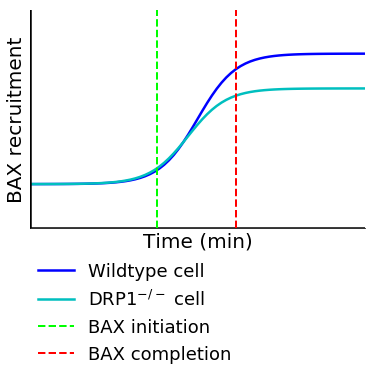

In [41]:
plot_cell_start(xdata, sig, drp, slope, xdata[i], sig[i], 1)
plt.savefig('Graph_.eps', bbox_inches='tight', transparent=True, dpi=300)